part b

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def create_derivative_kernels(size, sigma):
    k = size // 2
    vals = np.linspace(-k, k, size)
    yy, xx = np.meshgrid(vals, vals)
    print('xx: ',xx)
    print('yy: ',yy)
    G = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    G = G / G.sum()
    
    Gx = -(xx / (sigma**2)) * G
    Gy = -(yy / (sigma**2)) * G
    
    return Gx, Gy, xx, yy

# Compute 5x5 kernels for sigma=2
sigma = 2
Gx_5x5, Gy_5x5, _, _ = create_derivative_kernels(5, sigma)

print("Gx (Vertical Derivative Kernel):\n", Gx_5x5)
print("\nGy (Horizontal Derivative Kernel):\n", Gy_5x5)

xx:  [[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]
yy:  [[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
Gx (Vertical Derivative Kernel):
 [[ 0.01162342  0.01691198  0.01916378  0.01691198  0.01162342]
 [ 0.00845599  0.01230339  0.01394157  0.01230339  0.00845599]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.00845599 -0.01230339 -0.01394157 -0.01230339 -0.00845599]
 [-0.01162342 -0.01691198 -0.01916378 -0.01691198 -0.01162342]]

Gy (Horizontal Derivative Kernel):
 [[ 0.01162342  0.00845599 -0.         -0.00845599 -0.01162342]
 [ 0.01691198  0.01230339 -0.         -0.01230339 -0.01691198]
 [ 0.01916378  0.01394157 -0.         -0.01394157 -0.01916378]
 [ 0.01691198  0.01230339 -0.         -0.01230339 -0.01691198]
 [ 0.01162342  0.00845599 -0.         -0.00845599 -0.01162342]]


part C

xx:  [[-25. -25. -25. ... -25. -25. -25.]
 [-24. -24. -24. ... -24. -24. -24.]
 [-23. -23. -23. ... -23. -23. -23.]
 ...
 [ 23.  23.  23. ...  23.  23.  23.]
 [ 24.  24.  24. ...  24.  24.  24.]
 [ 25.  25.  25. ...  25.  25.  25.]]
yy:  [[-25. -24. -23. ...  23.  24.  25.]
 [-25. -24. -23. ...  23.  24.  25.]
 [-25. -24. -23. ...  23.  24.  25.]
 ...
 [-25. -24. -23. ...  23.  24.  25.]
 [-25. -24. -23. ...  23.  24.  25.]
 [-25. -24. -23. ...  23.  24.  25.]]


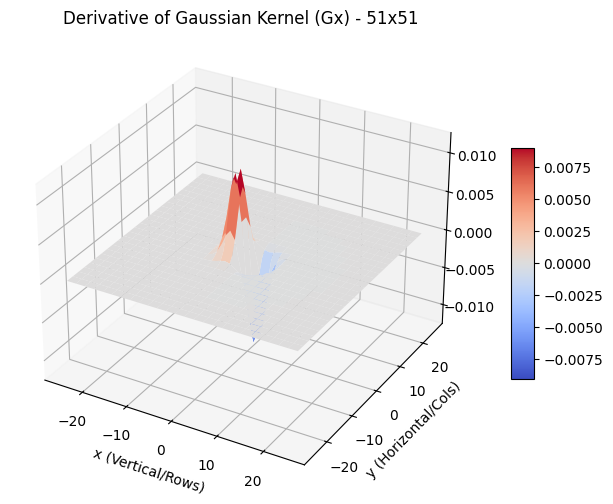

In [6]:
# Generate 51x51 kernels
Gx_51, Gy_51, xx_51, yy_51 = create_derivative_kernels(51, sigma=2)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot Gx (The Vertical Derivative)
surf = ax.plot_surface(xx_51, yy_51, Gx_51, cmap='coolwarm', linewidth=0)

ax.set_xlabel('x (Vertical/Rows)')
ax.set_ylabel('y (Horizontal/Cols)')
ax.set_title('Derivative of Gaussian Kernel (Gx) - 51x51')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

For y direction

xx:  [[-25. -25. -25. ... -25. -25. -25.]
 [-24. -24. -24. ... -24. -24. -24.]
 [-23. -23. -23. ... -23. -23. -23.]
 ...
 [ 23.  23.  23. ...  23.  23.  23.]
 [ 24.  24.  24. ...  24.  24.  24.]
 [ 25.  25.  25. ...  25.  25.  25.]]
yy:  [[-25. -24. -23. ...  23.  24.  25.]
 [-25. -24. -23. ...  23.  24.  25.]
 [-25. -24. -23. ...  23.  24.  25.]
 ...
 [-25. -24. -23. ...  23.  24.  25.]
 [-25. -24. -23. ...  23.  24.  25.]
 [-25. -24. -23. ...  23.  24.  25.]]


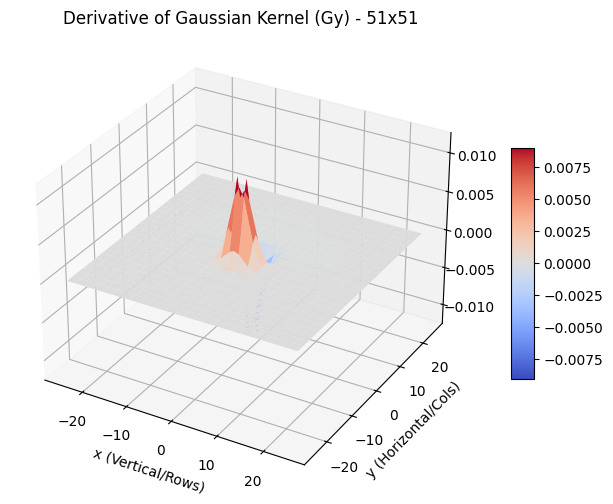

In [8]:
# Generate 51x51 kernels
Gx_51, Gy_51, xx_51, yy_51 = create_derivative_kernels(51, sigma=2)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot Gy (The Horizontal Derivative)
surf = ax.plot_surface(xx_51, yy_51, Gy_51, cmap='coolwarm', linewidth=0)

ax.set_xlabel('x (Vertical/Rows)')
ax.set_ylabel('y (Horizontal/Cols)')
ax.set_title('Derivative of Gaussian Kernel (Gy) - 51x51')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

part d

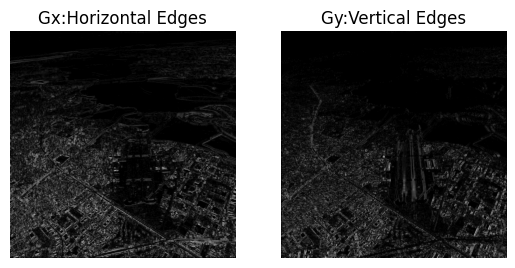

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('media/runway.png', cv.IMREAD_GRAYSCALE)
# computed derivative-of-gaussian kernels Gx,Gy
img_Gx = cv.filter2D(img, cv.CV_64F, Gx_5x5)
img_Gy = cv.filter2D(img, cv.CV_64F, Gy_5x5)
# Convert to absolute values for display (0-255)
abs_grad_x = cv.convertScaleAbs(img_Gx)
abs_grad_y = cv.convertScaleAbs(img_Gy)
#Display Results
plt.subplot(1, 2, 1)
plt.imshow(abs_grad_x, cmap='gray')
plt.title("Gx:Horizontal Edges")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(abs_grad_y, cmap='gray')
plt.title("Gy:Vertical Edges")
plt.axis('off')
# plt.subplots_adjust(wspace=2) 
plt.show()

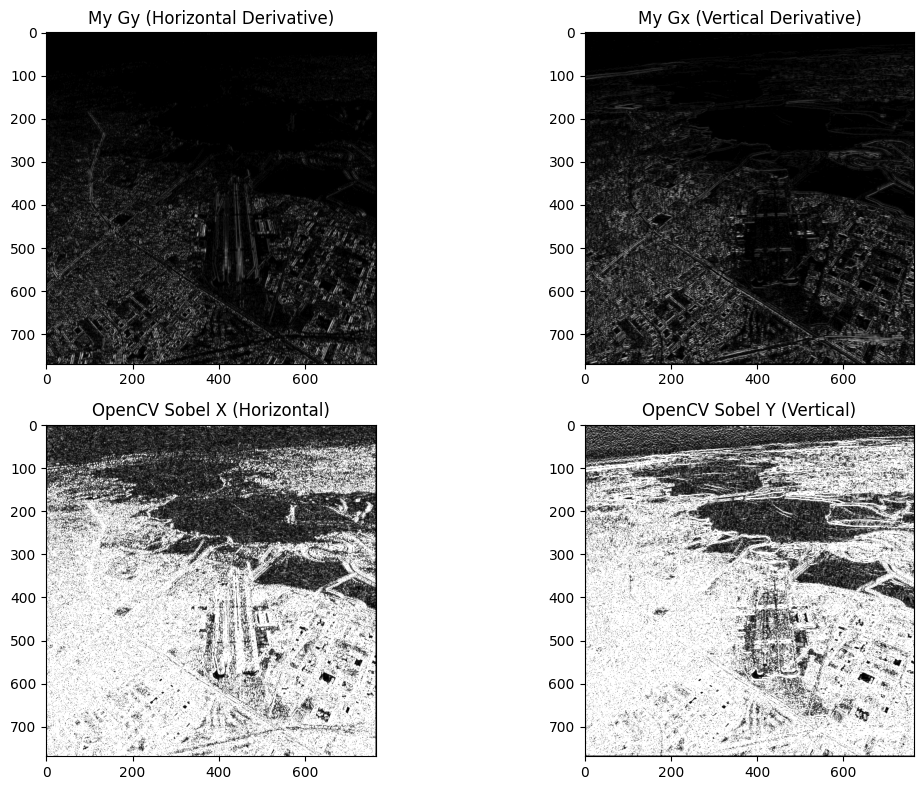

In [ ]:

sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)
abs_sobel_x = cv.convertScaleAbs(sobel_x)
abs_sobel_y = cv.convertScaleAbs(sobel_y)

plt.figure(figsize=(12, 8))

# Row 1:  DoG Results
plt.subplot(2, 2, 1)
plt.imshow(abs_grad_y, cmap='gray')
plt.title("My Gy (Horizontal Derivative)")
plt.subplot(2, 2, 2)
plt.imshow(abs_grad_x, cmap='gray')
plt.title("My Gx (Vertical Derivative)")

# Row 2: OpenCV Sobel Results
plt.subplot(2, 2, 3)
plt.imshow(abs_sobel_x, cmap='gray')
plt.title("OpenCV Sobel X (Horizontal)")

plt.subplot(2, 2, 4)
plt.imshow(abs_sobel_y, cmap='gray')
plt.title("OpenCV Sobel Y (Vertical)")

plt.tight_layout()
plt.show()